# Thue-Morse sequence as a fair-share sequence

Let's suppose a simple game that I'll call **The Greed Game**: there's several coins (`gil`) on the table. The rules are simple: we take turns and we may take one `gil`. You and me taking one turn will be defined as a **round**.

Is this a fair game? It is, as long as we keep playing full rounds. At the end of each round we both have one gil, so it doesn't matter who goes first. 

Let's also imagine what I'll call **The Weighed Greed Game**. It's almost the same as before, but this time instead of single coins, there are piles of coins. To keep it simple, let's imagine the piles have 1, 2, 3, 4, 5, 6, 7 and 8 `gil`. The game is the same: *Andy* and *Bob* take turns, but this time we can take one and only one pile of `gil`.

I'll go first.I take 8 `gil`. What do you do?

You'll probably take the pile with 7 `gil`. Then I'll take 6... and you can see where this is going. At the end, I have 20 `gil` and you have 16.

This seems unfair, right? At the beginning of each round, I always take the largest pile, leaving you with the second largest. Wouldn't it be better if we took turns being the first each round?

## A regular 4-turn order

Let's try again, with a smaller example: only 4 piles---with 1, 2, 3 and 4 `gil`---, but this time we take turns being the first in a round. In other words, the turn order is now Andy, Bob, Bob, Andy (`ABBA` for short)

I'll take 4, you'll likely take 3; now it's your turn again, so you'll likely take 2 and I'll take 1. final score: we both have 5 `gil`. Fair division!

So we can just repeat this algorithm to divide 8 coins equally, right? Let'see what happens with 8 coins:

- A takes 8
- B takes 7
- B takes 6
- A takes 5
- A takes 4
- B takes 3
- B takes 2
- A takes 1

Total: 18 `gil` for A; 18 `gil` for B. Hooray! This works and we can go home, right?

## The long run

However, this works under the assumption that we always play full rounds. Moreover, our 4-turn strategy only works perfectly if the number of turns is a multiple of 4---in other words, if the number of rounds is even---and still has a bias that favors the Player A for reasons that I will demostrate later.

Suppose that we play the Greed Game---or the Weighed Greed Game--- with piles of 1, 2, ..., 23 and 24 `gil`. But this time there's the extra catch that I can cut the game short at any *turn*. What's the most fair turn order?

Let's keep a running score with both strategies. The score is as follows: 

- Every time Andy has more money, it will be worth 1 point to the score
- Every time there's a tie, it will  be worth 0 points
- Every time Bob has more money, it will be worth -1 points

This way, a fair turn order should end up with a score of 0 (or close to it). Let's see how our game starts, assuming we have 24 piles of `gil`.

The regular turn order goes as follows:

| Turn | A's wealth | B's wealth | Turn score  | Running average score |
|------|------------|------------|-------------|-----------------------|
| 0    | 24         | 0          | 1           | 1.0                   |
| 1    | 24         | 23         | 1           | 1.0                   |
| 2    | 46         | 23         | 1           | 1.0                   |
| 3    | 46         | 44         | 1           | 1.0                   |
| 4    | 66         | 44         | 1           | 1.0                   |
| 5    | 66         | 63         | 1           | 1.0                   |
| 6    | 84         | 63         | 1           | 1.0                   |
| 7    | 84         | 80         | 1           | 1.0                   |
| 8    | 100        | 80         | 1           | 1.0                   |
| 9    | 100        | 95         | 1           | 1.0                   |
| 10   | 114        | 95         | 1           | 1.0                   |
| 11   | 114        | 108        | 1           | 1.0                   |
| 12   | 126        | 108        | 1           | 1.0                   |
| 13   | 126        | 119        | 1           | 1.0                   |
| 14   | 136        | 119        | 1           | 1.0                   |
| 15   | 136        | 128        | 1           | 1.0                   |
| 16   | 144        | 128        | 1           | 1.0                   |
| 17   | 144        | 135        | 1           | 1.0                   |
| 18   | 150        | 135        | 1           | 1.0                   |
| 19   | 150        | 140        | 1           | 1.0                   |
| 20   | 154        | 140        | 1           | 1.0                   |
| 21   | 154        | 143        | 1           | 1.0                   |
| 22   | 156        | 143        | 1           | 1.0                   |
| 23   | 156        | 144        | 1           | 1.0                   |

No surprises here. The regular order *always* gives an advantage to the first player and from the table, it's evident that Andy will always have more `gil`. What happens with the 4-turn order?

| Turn | A's wealth | B's wealth | Turn score | Running average score |
|------|------------|------------|------------|-----------------------|
| 0    | 24         | 0          | 1          | 1.0                   |
| 1    | 24         | 23         | 1          | 1.0                   |
| 2    | 24         | 45         | -1         | 0.3333333333333333    |
| 3    | 45         | 45         | 0          | 0.25                  |
| 4    | 65         | 45         | 1          | 0.4                   |
| 5    | 65         | 64         | 1          | 0.5                   |
| 6    | 65         | 82         | -1         | 0.2857142857142857    |
| 7    | 82         | 82         | 0          | 0.25                  |
| 8    | 98         | 82         | 1          | 0.3333333333333333    |
| 9    | 98         | 97         | 1          | 0.4                   |
| 10   | 98         | 111        | -1         | 0.2727272727272727    |
| 11   | 111        | 111        | 0          | 0.25                  |
| 12   | 123        | 111        | 1          | 0.3076923076923077    |
| 13   | 123        | 122        | 1          | 0.35714285714285715   |
| 14   | 123        | 132        | -1         | 0.26666666666666666   |
| 15   | 132        | 132        | 0          | 0.25                  |
| 16   | 140        | 132        | 1          | 0.29411764705882354   |
| 17   | 140        | 139        | 1          | 0.3333333333333333    |
| 18   | 140        | 145        | -1         | 0.2631578947368421    |
| 19   | 145        | 145        | 0          | 0.25                  |
| 20   | 149        | 145        | 1          | 0.2857142857142857    |
| 21   | 149        | 148        | 1          | 0.3181818181818182    |
| 22   | 149        | 150        | -1         | 0.2608695652173913    |
| 23   | 150        | 150        | 0          | 0.25                  |

Immediately we can see that this is better, but there's a catch: notice how the average score is always positive and seems to tend to 0.25. Look at the third column for a hint: in any four consecutive turns, Andy wins two, B wins one and they are tied in one. This order, while better, still gives Andy an edge. Can we do better?

## Thue-Morse Sequence

Why not extend the idea of taking turns in taking turns? As we've seen, using only the 4-turn order gives an advantage to Andy. What if every 4 turns the 4-turn is reversed? This way, we could get an 8-turn order... but using it could also be unfair, right? why not then take the 8-turn order and reverse it after 8 turns? And then after 16 turns...

You get the idea of how this goes. In general, we can always construct a fair sequence by taking the sequence so far and reversing it. In essence, doing this forever will give us the Thue-Morse sequence. But, how does it fare against the other strategies?

| Turn | A's wealth | B's wealth | Turn score | Running average score |
|------|------------|------------|------------|-----------------------|
| 0    | 24         | 0          | 1          | 1.0                   |
| 1    | 24         | 23         | 1          | 1.0                   |
| 2    | 24         | 45         | -1         | 0.3333333333333333    |
| 3    | 45         | 45         | 0          | 0.25                  |
| 4    | 45         | 65         | -1         | 0.0                   |
| 5    | 64         | 65         | -1         | -0.16666666666666666  |
| 6    | 82         | 65         | 1          | 0.0                   |
| 7    | 82         | 82         | 0          | 0.0                   |
| 8    | 82         | 98         | -1         | -0.1111111111111111   |
| 9    | 97         | 98         | -1         | -0.2                  |
| 10   | 111        | 98         | 1          | -0.09090909090909091  |
| 11   | 111        | 111        | 0          | -0.08333333333333333  |
| 12   | 123        | 111        | 1          | 0.0                   |
| 13   | 123        | 122        | 1          | 0.07142857142857142   |
| 14   | 123        | 132        | -1         | 0.0                   |
| 15   | 132        | 132        | 0          | 0.0                   |
| 16   | 132        | 140        | -1         | -0.058823529411764705 |
| 17   | 139        | 140        | -1         | -0.1111111111111111   |
| 18   | 145        | 140        | 1          | -0.05263157894736842  |
| 19   | 145        | 145        | 0          | -0.05                 |
| 20   | 149        | 145        | 1          | 0.0                   |
| 21   | 149        | 148        | 1          | 0.045454545454545456  |
| 22   | 149        | 150        | -1         | 0.0                   |
| 23   | 150        | 150        | 0          | 0.0                   |

This is *way* better. Look at the last column: now there's three things to notice:

1. The running average is sometimes positive and sometimes negative, which means Andy doesn't always have the advantage;
2. There are many zeroes, which means there are many (cutting) points at which the whole sequence is fair; and
3. The absolute values of the running average get smaller and smaller and tend toward zero, meaning that the longer this sequence goes, the most likely it is to be fair at any one point.

So, what gives? The Thue-Morse sequence is thus a fair(-er) way of "taking turns" if we don't know ahead of time how long the game will go on. the Weighed game serves to illustrate a situation that may be encountered in many situations in life: there's a limited resource to draw from and being first matters. With two parties vying to get it, the Thue-Morse sequence offers a first approach as to how to allocate that resource in a fair way.

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.figure import figaspect

In [2]:
%matplotlib inline

In [3]:
def run_game(sequence):
    '''Run the greed game where a and b take turns according to a binary sequence.
    
    At every turn, the winner (a or b) adds one point to their score.'''
    a = 0
    b = 0
    a_list = []
    b_list = []
    total = len(sequence)
    for i in sequence:
        if i == '0':
            a += 1
        else:
            b += 1
        a_list.append(a)
        b_list.append(b)
    return a, b, a_list, b_list

In [4]:
def run_weighed_game(sequence):
    '''
    Run the greed game where a and b take turns according to a binary sequence.
    
    The point rewards are not equal. This weighed game simulates there being
    several piles of points in decreasing value and the winner gets the larger
    available pile.
    '''
    a = 0
    b = 0
    a_list = []
    b_list = []
    total = len(sequence)
    for idx, i in enumerate(sequence):
        val = total - idx
        if i == '0':
            a += val
        else:
            b += val
        a_list.append(a)
        b_list.append(b)
    return a, b, a_list, b_list

In [5]:
# Thue-Morse sequence: https://oeis.org/A010060

def thue(n):
    '''Generate the first n terms of the Thue Morse Sequence'''
    seq = '0'
    for i in range(1, n):
        if i%2 == 0:
            seq += str(seq[i//2])
        else:
            seq += str(1 - int(seq[i//2]))
    return seq

In [6]:
# Comparative graph
def player_advantage(a_list, b_list):
    '''
    Compares turn-by-turn the gains of player a and player b, returns a list 
    of who is in the lead at any one turn.'''
    
    # For this example, assume both lists have the same size
    adv = []
    for idx in range(len(a_list)):
        if a_list[idx] == b_list[idx]:
            adv.append(0)
        elif a_list[idx] > b_list[idx]:
            adv.append(1)
        else:
            adv.append(-1)
    return adv

In [7]:
def cumavg(my_list):
    '''Return the running average of a list.'''
    your_list = []
    for idx, i in enumerate(np.cumsum(my_list)):
        your_list.append(i/(idx+1))
    return your_list

In [8]:
# How many rounds? Please use an even integer
# smaller numbers give clearer short-term images
# larger numbers give better insight into long-term trends
n = 12

In [9]:
# regular sequence of turns
reg = '01' * int(n)

# Run the game in regular and weighed variants
reg_a, reg_b, reg_list_a, reg_list_b = run_game(reg)
wreg_a, wreg_b, wreg_list_a, wreg_list_b = run_weighed_game(reg)

# Calculate turn-by-turn advantage and running average advantage
regadvantage = player_advantage(reg_list_a, reg_list_b)
regadvantage_avg = cumavg(regadvantage)

wregadvantage = player_advantage(wreg_list_a, wreg_list_b)
wregadvantage_avg = cumavg(wregadvantage)

In [10]:
# regular sequence of 4 turns
reg4 = '0110' * int(n/2)

# Run the game in regular and weighed variants
reg4_a, reg4_b, reg4_list_a, reg4_list_b = run_game(reg4)
wreg4_a, wreg4_b, wreg4_list_a, wreg4_list_b = run_weighed_game(reg4)

# Calculate turn-by-turn advantage and running average advantage
reg4advantage = player_advantage(reg4_list_a, reg4_list_b)
reg4advantage_avg = cumavg(reg4advantage)

wreg4advantage = player_advantage(wreg4_list_a, wreg4_list_b)
wreg4advantage_avg = cumavg(wreg4advantage)

In [11]:
# Thue-Morse Sequence
tms = thue(int(n*2))

# Run the game in regular and weighed variants
tms_a, tms_b, tms_list_a, tms_list_b = run_game(tms)
wtms_a, wtms_b, wtms_list_a, wtms_list_b = run_weighed_game(tms)

# Calculate turn-by-turn advantage and running average advantage
tmsadvantage = player_advantage(tms_list_a, tms_list_b)
tmsadvantage_avg = cumavg(tmsadvantage)

wtmsadvantage = player_advantage(wtms_list_a, wtms_list_b)
wtmsadvantage_avg = cumavg(wtmsadvantage)

In [12]:
# turns
x = np.linspace(1, n*2, n*2)
zeroes = np.zeros_like(x)

# Figure size tuple
#w, h = figaspect(16/9)
#s = (w,h)
s = (15,15)
# Figure style
fs = 'ggplot'

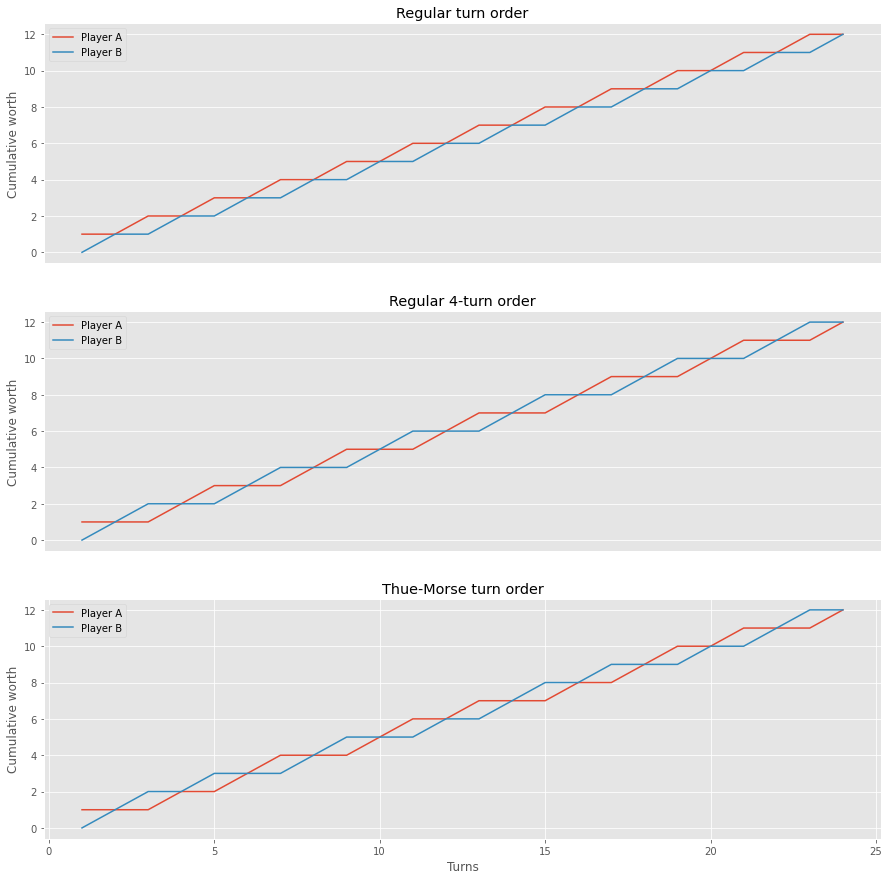

In [13]:
# Let's run the Greed game with regular turns, with the 4-turn strategy,
# and with Thue-Morse turn order

with plt.style.context(fs):
    plt.figure(figsize=s)
    plt.subplot(311)
    plt.title('Regular turn order')
    plt.ylabel('Cumulative worth')
    plt.plot(x, reg_list_a, label='Player A')
    plt.plot(x, reg_list_b, label='Player B')
    plt.legend()
    plt.xticks([])
    plt.subplot(312)
    

    plt.title('Regular 4-turn order')
    plt.ylabel('Cumulative worth')
    plt.plot(x, reg4_list_a, label='Player A')
    plt.plot(x, reg4_list_b, label='Player B')
    plt.legend()
    plt.xticks([])
    
    plt.subplot(313)
    plt.title('Thue-Morse turn order')
    plt.xlabel('Turns')
    plt.ylabel('Cumulative worth')
    plt.plot(x, tms_list_a, label='Player A')
    plt.plot(x, tms_list_b, label='Player B')
    plt.legend()

    plt.show()

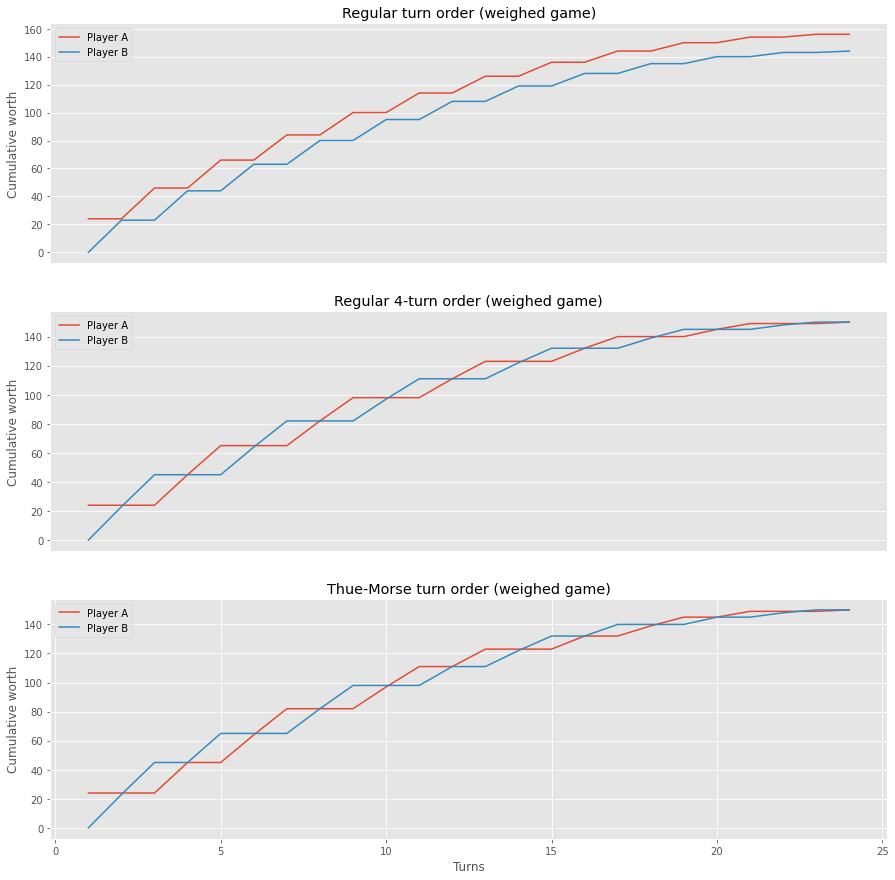

In [14]:
with plt.style.context(fs):
    plt.figure(figsize=s)
    plt.subplot(311)

    plt.title('Regular turn order (weighed game)')
    plt.ylabel('Cumulative worth')
    plt.plot(x, wreg_list_a, label='Player A')
    plt.plot(x, wreg_list_b, label='Player B')
    plt.legend()
    plt.xticks([])
    
    plt.subplot(312)
    plt.title('Regular 4-turn order (weighed game)')
    plt.ylabel('Cumulative worth')
    plt.plot(x, wreg4_list_a, label='Player A')
    plt.plot(x, wreg4_list_b, label='Player B')
    plt.legend()
    plt.xticks([])
    
    plt.subplot(313)
    plt.title('Thue-Morse turn order (weighed game)')
    plt.xlabel('Turns')
    plt.ylabel('Cumulative worth')
    plt.plot(x, wtms_list_a, label='Player A')
    plt.plot(x, wtms_list_b, label='Player B')
    plt.legend()
    
    plt.show()

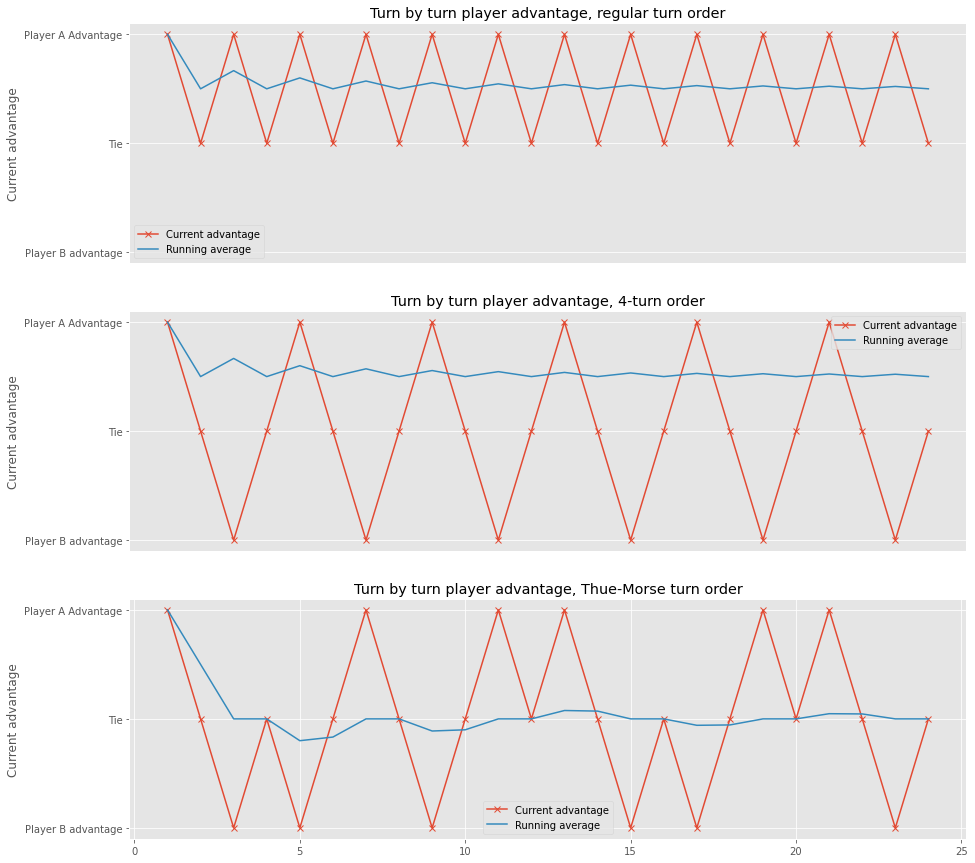

In [15]:
with plt.style.context(fs):
    plt.figure(figsize=s)
    plt.subplot(311)
    plt.title('Turn by turn player advantage, regular turn order')
    plt.ylabel('Current advantage')
    plt.yticks([-1, 0, 1], ['Player B advantage', 'Tie', 'Player A Advantage'])
    plt.ylim((-1.1, 1.1))
    plt.plot(x, regadvantage, '-x', label='Current advantage')
    #plt.plot(x, zeroes, label='Tie line')
    plt.plot(x, regadvantage_avg, label='Running average')
    plt.legend()
    plt.xticks([])
    
    plt.subplot(312)
    plt.title('Turn by turn player advantage, 4-turn order')
    plt.ylabel('Current advantage')
    plt.yticks([-1, 0, 1], ['Player B advantage', 'Tie', 'Player A Advantage'])
    plt.ylim((-1.1, 1.1))
    plt.plot(x, reg4advantage, '-x', label='Current advantage')
    #plt.plot(x, zeroes, label='Tie line')
    plt.plot(x, regadvantage_avg, label='Running average')
    plt.legend()
    plt.xticks([])
    
    plt.subplot(313)
    plt.title('Turn by turn player advantage, Thue-Morse turn order')
    plt.ylabel('Current advantage')
    plt.yticks([-1, 0, 1], ['Player B advantage', 'Tie', 'Player A Advantage'])
    plt.ylim((-1.1, 1.1))
    plt.plot(x, tmsadvantage, '-x', label='Current advantage')
    #plt.plot(x, zeroes, label='Tie line')
    plt.plot(x, tmsadvantage_avg, label='Running average')
    plt.legend()
    plt.show()

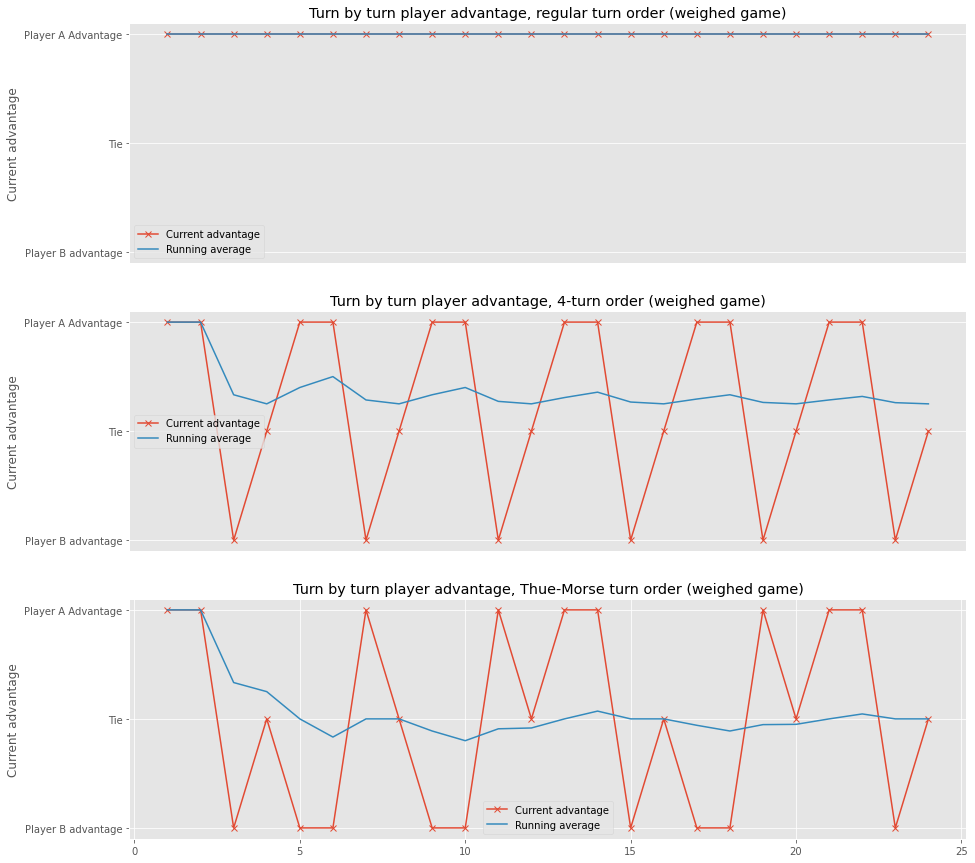

In [16]:
with plt.style.context(fs):
    plt.figure(figsize=s)
    plt.subplot(311)
    plt.title('Turn by turn player advantage, regular turn order (weighed game)')
    plt.ylabel('Current advantage')
    plt.yticks([-1, 0, 1], ['Player B advantage', 'Tie', 'Player A Advantage'])
    plt.ylim((-1.1, 1.1))
    plt.plot(x, wregadvantage, '-x', label='Current advantage')
    #plt.plot(x, zeroes, label='Tie line')
    plt.plot(x, wregadvantage_avg, label='Running average')
    plt.legend()
    plt.xticks([])
    
    plt.subplot(312)
    plt.title('Turn by turn player advantage, 4-turn order (weighed game)')
    plt.ylabel('Current advantage')
    plt.yticks([-1, 0, 1], ['Player B advantage', 'Tie', 'Player A Advantage'])
    plt.ylim((-1.1, 1.1))
    plt.plot(x, wreg4advantage, '-x', label='Current advantage')
    #plt.plot(x, zeroes, label='Tie line')
    plt.plot(x, wreg4advantage_avg, label='Running average')
    plt.legend()
    plt.xticks([])
    
    plt.subplot(313)
    plt.title('Turn by turn player advantage, Thue-Morse turn order (weighed game)')
    plt.ylabel('Current advantage')
    plt.yticks([-1, 0, 1], ['Player B advantage', 'Tie', 'Player A Advantage'])
    plt.ylim((-1.1, 1.1))
    plt.plot(x, wtmsadvantage, '-x', label='Current advantage')
    #plt.plot(x, zeroes, label='Tie line')
    plt.plot(x, wtmsadvantage_avg, label='Running average')
    plt.legend()
    plt.show()

In [17]:
for idx, i in enumerate(wreg_list_a):
    print(idx, '\t', wreg_list_a[idx], '\t', wreg_list_b[idx], '\t', wregadvantage[idx], '\t', wregadvantage_avg[idx])

0 	 24 	 0 	 1 	 1.0
1 	 24 	 23 	 1 	 1.0
2 	 46 	 23 	 1 	 1.0
3 	 46 	 44 	 1 	 1.0
4 	 66 	 44 	 1 	 1.0
5 	 66 	 63 	 1 	 1.0
6 	 84 	 63 	 1 	 1.0
7 	 84 	 80 	 1 	 1.0
8 	 100 	 80 	 1 	 1.0
9 	 100 	 95 	 1 	 1.0
10 	 114 	 95 	 1 	 1.0
11 	 114 	 108 	 1 	 1.0
12 	 126 	 108 	 1 	 1.0
13 	 126 	 119 	 1 	 1.0
14 	 136 	 119 	 1 	 1.0
15 	 136 	 128 	 1 	 1.0
16 	 144 	 128 	 1 	 1.0
17 	 144 	 135 	 1 	 1.0
18 	 150 	 135 	 1 	 1.0
19 	 150 	 140 	 1 	 1.0
20 	 154 	 140 	 1 	 1.0
21 	 154 	 143 	 1 	 1.0
22 	 156 	 143 	 1 	 1.0
23 	 156 	 144 	 1 	 1.0


In [18]:
for idx, i in enumerate(wreg_list_a):
    print(idx, '\t', wreg4_list_a[idx], '\t', wreg4_list_b[idx], '\t', wreg4advantage[idx], '\t', wreg4advantage_avg[idx])

0 	 24 	 0 	 1 	 1.0
1 	 24 	 23 	 1 	 1.0
2 	 24 	 45 	 -1 	 0.3333333333333333
3 	 45 	 45 	 0 	 0.25
4 	 65 	 45 	 1 	 0.4
5 	 65 	 64 	 1 	 0.5
6 	 65 	 82 	 -1 	 0.2857142857142857
7 	 82 	 82 	 0 	 0.25
8 	 98 	 82 	 1 	 0.3333333333333333
9 	 98 	 97 	 1 	 0.4
10 	 98 	 111 	 -1 	 0.2727272727272727
11 	 111 	 111 	 0 	 0.25
12 	 123 	 111 	 1 	 0.3076923076923077
13 	 123 	 122 	 1 	 0.35714285714285715
14 	 123 	 132 	 -1 	 0.26666666666666666
15 	 132 	 132 	 0 	 0.25
16 	 140 	 132 	 1 	 0.29411764705882354
17 	 140 	 139 	 1 	 0.3333333333333333
18 	 140 	 145 	 -1 	 0.2631578947368421
19 	 145 	 145 	 0 	 0.25
20 	 149 	 145 	 1 	 0.2857142857142857
21 	 149 	 148 	 1 	 0.3181818181818182
22 	 149 	 150 	 -1 	 0.2608695652173913
23 	 150 	 150 	 0 	 0.25


In [19]:
for idx, i in enumerate(wreg_list_a):
    print(idx, '\t', wtms_list_a[idx], '\t', wtms_list_b[idx], '\t', wtmsadvantage[idx], '\t', wtmsadvantage_avg[idx])

0 	 24 	 0 	 1 	 1.0
1 	 24 	 23 	 1 	 1.0
2 	 24 	 45 	 -1 	 0.3333333333333333
3 	 45 	 45 	 0 	 0.25
4 	 45 	 65 	 -1 	 0.0
5 	 64 	 65 	 -1 	 -0.16666666666666666
6 	 82 	 65 	 1 	 0.0
7 	 82 	 82 	 0 	 0.0
8 	 82 	 98 	 -1 	 -0.1111111111111111
9 	 97 	 98 	 -1 	 -0.2
10 	 111 	 98 	 1 	 -0.09090909090909091
11 	 111 	 111 	 0 	 -0.08333333333333333
12 	 123 	 111 	 1 	 0.0
13 	 123 	 122 	 1 	 0.07142857142857142
14 	 123 	 132 	 -1 	 0.0
15 	 132 	 132 	 0 	 0.0
16 	 132 	 140 	 -1 	 -0.058823529411764705
17 	 139 	 140 	 -1 	 -0.1111111111111111
18 	 145 	 140 	 1 	 -0.05263157894736842
19 	 145 	 145 	 0 	 -0.05
20 	 149 	 145 	 1 	 0.0
21 	 149 	 148 	 1 	 0.045454545454545456
22 	 149 	 150 	 -1 	 0.0
23 	 150 	 150 	 0 	 0.0
